In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Flatten, Input
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
#import mnist
import keras.datasets.mnist as mnist
from sklearn.model_selection import train_test_split

# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[0])
plt.title(f"image shape: {x_train[0].shape}")
plt.show()
import keras
from keras.optimizers import Adam


: 

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [ ]:
encoder_input = Input(shape=(28, 28, 1), name="img")
x = layers.Flatten()(encoder_input)
encoder_output = layers.Dense(64, activation="relu")(x)
encoder = keras.Model(encoder_input, encoder_output, name="encoder")

decoder_input =  layers.InputLayer(input_shape=(64,))(encoder_output)
x = layers.Dense(784, activation="relu")(decoder_input)
decoder_output = layers.Reshape((28, 28, 1))(x)
decoder = keras.Model(decoder_input, decoder_output, name="decoder")

opt = keras.optimizers.Adam(learning_rate=0.001)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
# def decoder_loss(y_true, y_pred):
#     return keras.losses.mean_squared_error(y_true, y_pred)
# def encoder_loss(y_true, y_pred):
#     return keras.losses.mean_squared_error(y_true, y_pred)
# def end_to_end_loss(y_true, y_pred):
#     return keras.losses.mean_squared_error(y_true, y_pred)
# def custom_loss(y_true, y_pred, args):
#     enc_loss = keras.losses.mean_squared_error(y_true, y_pred)

print(decoder.summary())
print(encoder.summary())
autoencoder.summary()
def custom_loss(y_true, y_pred):
    image_in = y_true
    encode_true = encoder(image_in)
    decode_true = decoder(encode_true)
    print(image_in)
    image_out = y_pred
    print(image_out)
    encoded = encoder(image_in)

    loss3 = keras.losses.mean_absolute_error(y_true, y_pred)
    return loss3
decoder.compile(optimizer=opt, loss="mse")
autoencoder.compile(optimizer=opt, loss=custom_loss, metrics=[custom_loss])


autoencoder.fit(x=x_train, y=[x_train,y_train], epochs=10, batch_size=128, validation_split=0.1)

NameError: name 'Input' is not defined

1/1 [==============================] - 0s 17ms/step
(1, 64)
1/1 [==============================] - 0s 21ms/step


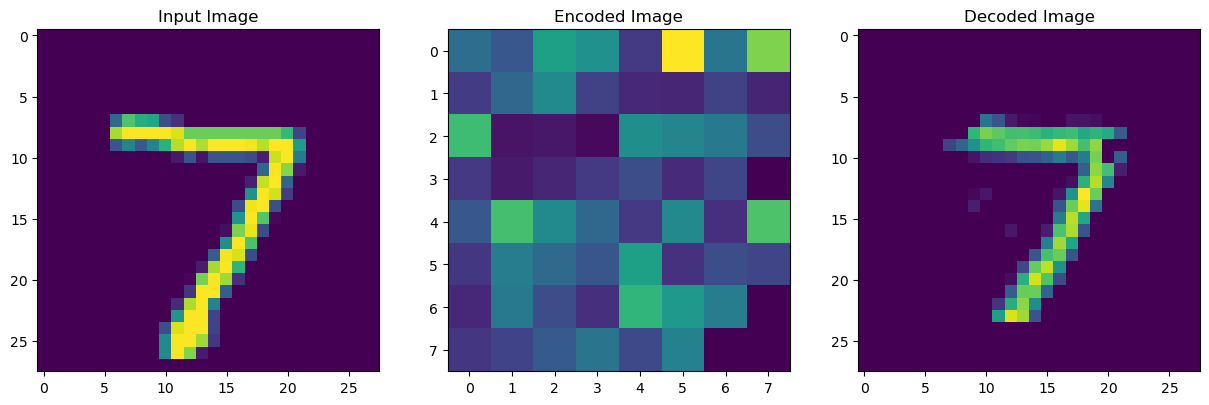

313/313 [==============================] - 0s 403us/step
(10000, 64)


In [ ]:
example = encoder.predict(x_test[0].reshape(1, 28, 28, 1))
print(example.shape)
input_image = x_test[0].reshape(28, 28)
example_image = example.reshape(8, 8)
recoved_image = decoder.predict(example.reshape(1, 64))
# Plot the images side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(input_image)
ax1.set_title("Input Image")
ax2.imshow(example_image)
ax2.set_title("Encoded Image")
ax3.imshow(recoved_image.reshape(28, 28))
ax3.set_title("Decoded Image")
plt.show()
codes = encoder.predict(x_test.reshape(-1, 28, 28, 1))
print(codes.shape)


In [ ]:
encoder_input = Input(shape=(28, 28, 1), name="img")
encoder_input_flat = layers.Flatten()(encoder_input)
encoder_output = layers.Dense(64, activation="relu")(encoder_input_flat)
encoder = keras.Model(encoder_input, encoder_output, name="encoder")

decoder_input =  layers.InputLayer(input_shape=(64,))(encoder_output)
x = layers.Dense(784, activation="relu")(decoder_input)
decoder_output = layers.Reshape((28, 28, 1))(x)
decoder = keras.Model(decoder_input, decoder_output, name="decoder")

opt = keras.optimizers.Adam(learning_rate=0.001)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
# def decoder_loss(y_true, y_pred):
#     return keras.losses.mean_squared_error(y_true, y_pred)
# def encoder_loss(y_true, y_pred):
#     return keras.losses.mean_squared_error(y_true, y_pred)
# def end_to_end_loss(y_true, y_pred):
#     return keras.losses.mean_squared_error(y_true, y_pred)
# def custom_loss(y_true, y_pred, args):
#     enc_loss = keras.losses.mean_squared_error(y_true, y_pred)

print(decoder.summary())
print(encoder.summary())
autoencoder.summary()

decoder.compile(optimizer=opt, loss="mse")
autoencoder.compile(optimizer=opt, loss="mse")


autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_split=0.1)

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_62 (InputLayer)       [(None, 64)]              0         
                                                                 
 dense_94 (Dense)            (None, 784)               50960     
                                                                 
 reshape_38 (Reshape)        (None, 28, 28, 1)         0         
                                                                 
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________
None
Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_52 (Flatten)        (Non

In [ ]:
np.random.seed(42)
#load csv into 
# data_path = r"C:\Users\joeli\OneDrive\Documents\GitHub\EncoderDecoder\JJ_LUT.csv"
headers = "Cm,Ch,Bm,Bh,T,sR,sG,sB"
# df = pd.read_csv(config.LUTv1_PATH, sep=",", header=None, names=headers.split(","))
# df = pd.read_csv(config.LUTv2_PATH, sep=",", header=None, names=headers.split(","))
# df = pd.read_csv(config.LUTv3_PATH, sep=",", header=None, names=headers.split(","))

df = pd.read_csv(r"C:\Users\joeli\OneDrive\Documents\GitHub\Applied-Deep-Learning-with-Keras\data\JJ_LUTv1.csv", sep=",", header=None, names=headers.split(","))

df.head()
#remove header
df = df.iloc[1:]
#inputs = Cm,Ch,Bm,epi_thick
y = df[['Cm','Ch','Bm','Bh','T']]
print(y.head())

#outputs = sR,sG,sB
x = df[['sR','sG','sB']]
print(x.head())

df.head()
#remove headers and convert to numpy array
x = df[['sR','sG','sB']].iloc[1:].to_numpy()
y = df[['Cm','Ch','Bm','Bh','T']].iloc[1:].to_numpy()
#train nn on x,y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)

#numpy arrays
x_train = np.asarray(x_train).reshape(-1,3).astype('float32')


x_test = np.asarray(x_test).reshape(-1,3).astype('float32')


#normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

print(f"aft norm x_train[0] {x_train[0]}")

                Cm   Ch        Bm        Bh         T
0.0020 0.020  0.01  0.1  8.654914  8.626503  7.138389
       0.070  0.01  0.1  7.385634  7.121985  5.208188
       0.160  0.01  0.1  5.900273  5.417742  3.971776
       0.320  0.01  0.1  5.047698  4.355993  3.201509
0.0135 0.003  0.01  0.1  8.184879  8.136533  6.527816
               sR   sG   sB
0.0020 0.020  268  232  207
       0.070  259  209  178
       0.160  241  180  158
       0.320  231  157  143
0.0135 0.003  263  225  198
bef norm x_train[0] [54. 39. 33.  0.  0.]
aft norm x_train[0] [0.21176471 0.15294118 0.12941176 0.         0.        ]


In [ ]:
class MyModel(tf.keras.Model):

  def __init__(self):
    super().__init__()
    self.opt = keras.optimizers.Adam(learning_rate=1e-4)
    self.codes = codes
    self.enc_in = Input(shape=(3), name="img")

    self.enc_d1 = layers.Dense(70, activation="relu")(self.enc_in)
    self.enc_d2 = layers.Dense(70, activation="relu")(self.enc_d1)
    self.enc_out = layers.Dense(5, activation="relu")(self.enc_d2)
    self.encoder = keras.Model(self.enc_in, self.enc_out, name="encoder")
    #call parent opt
    
    # self.encoder.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss="mse")
    print(self.encoder.summary())
    # self.dec_in =  layers.InputLayer(input_shape=(5,))(self.enc_out)
    # self.dec_in = InputLayer(shape=(5), name="dec_in")(self.enc_out)
    self.dec_in = layers.Dense(5, activation="relu")(self.enc_out)
    self.dec_d1 = layers.Dense(70, activation="relu")(self.dec_in)
    self.dec_d2 = layers.Dense(70, activation="relu")(self.dec_d1)
    self.dec_out = layers.Dense(3, activation="relu")(self.dec_d2)

    self.decoder = keras.Model(self.dec_in, self.dec_out, name="decoder")
    # self.decoder.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss="mse")
    print(self.decoder.summary())


    self.autoencoder = keras.Model(self.enc_in, self.dec_out, name="autoencoder")
    self.autoencoder.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss="mse")

  def call(self, inputs):
    print("call")
    # self.decoder.add_loss("mse")
    # self.encoder.add_loss("mse")
    # self.encoder.add_loss(keras.losses.mean_squared_error(y_true=inputs, y_pred=self.dec_out))
    #wrap your loss computation in a zero argument `lambda`
    pixels = self.enc_in
    enc = self.enc_out
    dec = self.dec_out
    # #convert to tensor
    # pixels = tf.convert_to_tensor(pixels)
    # enc = tf.convert_to_tensor(enc)
    # dec = tf.convert_to_tensor(dec)
    # self.autoencoder.add_loss(lambda: keras.losses.mean_squared_error(pixels, dec))
    self.autoencoder.add_loss(lambda: keras.losses.mean_squared_error(inputs, dec))


    # self.decoder.add_loss(keras.losses.mean_squared_error(y_true=inputs, y_pred=self.decoder_output))
    return inputs


model = MyModel()
#build model
model.build(input_shape=(None, 3))
model.compile(loss="mse")
model.summary()
print(x_train.shape)
print(y_train.shape)
model.fit(x_train, x_train, epochs=10, batch_size=128, validation_split=0.1)

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 3)]               0         
                                                                 
 dense_428 (Dense)           (None, 70)                280       
                                                                 
 dense_429 (Dense)           (None, 70)                4970      
                                                                 
 dense_430 (Dense)           (None, 5)                 355       
                                                                 
Total params: 5,605
Trainable params: 5,605
Non-trainable params: 0
_________________________________________________________________
None
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_181 (InputLayer)      [(None

ValueError: in user code:

    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\engine\training.py", line 1083, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\engine\compile_utils.py", line 316, in __call__
        total_total_loss_mean_value = tf.add_n(total_loss_mean_values)
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\layers\core\tf_op_layer.py", line 119, in handle
        return TFOpLambda(op)(*args, **kwargs)
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "tf.math.add_n_28" (type TFOpLambda).
    
    Shapes must be equal rank, but are 0 and 1
    	From merging shape 0 with other shapes. for '{{node tf.math.add_n_28/AddN}} = AddN[N=2, T=DT_FLOAT](tf.math.add_n_28/AddN/mean_squared_error/weighted_loss/value, Placeholder)' with input shapes: [], [?].
    
    Call arguments received by layer "tf.math.add_n_28" (type TFOpLambda):
      • inputs=['tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(None,), dtype=float32)']
      • name=None


In [ ]:
# model.build(input_shape=(None, 3))
# model.summary()
# # model.compile(optimizer=model.opt, loss="mse")
# model.fit(x_train, x_train, epochs=10, batch_size=128, validation_split=0.1)

call
Model: "my_model_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Functional)        (None, 5)                 5605      
                                                                 
 decoder (Functional)        (None, 3)                 5603      
                                                                 
 autoencoder (Functional)    (None, 3)                 11208     
                                                                 
Total params: 11,208
Trainable params: 11,208
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
call


ValueError: in user code:

    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\engine\training.py", line 1083, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\engine\compile_utils.py", line 316, in __call__
        total_total_loss_mean_value = tf.add_n(total_loss_mean_values)
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\layers\core\tf_op_layer.py", line 119, in handle
        return TFOpLambda(op)(*args, **kwargs)
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "tf.math.add_n_14" (type TFOpLambda).
    
    Shapes must be equal rank, but are 0 and 1
    	From merging shape 0 with other shapes. for '{{node tf.math.add_n_14/AddN}} = AddN[N=2, T=DT_FLOAT](tf.math.add_n_14/AddN/mean_squared_error/weighted_loss/value, Placeholder)' with input shapes: [], [?].
    
    Call arguments received by layer "tf.math.add_n_14" (type TFOpLambda):
      • inputs=['tf.Tensor(shape=(), dtype=float32)', 'tf.Tensor(shape=(None,), dtype=float32)']
      • name=None


In [ ]:
# model.fit(x_train, x_train, epochs=10, batch_size=128, validation_split=0.1)

In [ ]:
encoder_input = Input(shape=(5,), name="img")
x = layers.Dense(70, activation="relu")(encoder_input)
x = layers.Dense(70, activation="relu")(x)
encoder_output = layers.Dense(5, activation="relu")(x)
encoder = keras.Model(encoder_input, encoder_output, name="encoder")
# encoder.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4), loss="mse")
decoder_input =  layers.Dense(5, activation="relu")(encoder_output)
x = layers.Dense(70, activation="relu")(decoder_input)
x = layers.Dense(70, activation="relu")(decoder_input)
decoder_output = layers.Dense(5, activation="relu")(x)
decoder = keras.Model(encoder_output, decoder_output, name="decoder")
autoencoder_input = encoder_output
autoencoder_output = decoder_output
autoencoder = keras.Model(encoder_input,decoder_output, name="autoencoder")

print(decoder.summary())
print(encoder.summary())
autoencoder.summary()
 
opt = Adam(lr=1e-4)
losses ={ "encoder": "mse", "decoder": "mse", "autoencoder": "mse"}
loss_weights = {"encoder":.33, "decoder":.33, "autoencoder": .33}
# autoencoder.compile(optimizer=opt, loss=losses,loss_weights=loss_weights, metrics=['accuracy'])
outputs = keras.layers.average([encoder_output, decoder_output, autoencoder_output])
inputs = keras.layers.concatenate([encoder_input, decoder_input, autoencoder_input], axis=0)
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)
ensemble_model.compile(optimizer=opt, loss=losses,loss_weights=loss_weights, metrics=['accuracy'])
ensemble_model.summary()






# Model Compiling
# model.compile(optimizer=opt, loss=losses,metrics="accuracy")

# Model Fitting
# H = autoencoder.fit(x=[x_train, y_train, x_train],
# y={'encoder': y_train, 'decoder': x_train , 'autoencoder': x_train},
# 	validation_data=([x_test, y_test, x_test],
#     	{'encoder': y_test, 'decoder': x_test , 'autoencoder': x_test}), epochs=10, batch_size=128)
                            









Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_85 (InputLayer)       [(None, 5)]               0         
                                                                 
 dense_322 (Dense)           (None, 5)                 30        
                                                                 
 dense_324 (Dense)           (None, 70)                420       
                                                                 
 dense_325 (Dense)           (None, 5)                 355       
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________
None
Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 5)

c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


ValueError: Found input tensor cannot be reached given provided output tensors. Please make sure the tensor KerasTensor(type_spec=TensorSpec(shape=(None, 5), dtype=tf.float32, name='img'), name='img', description="created by layer 'img'") is included in the model inputs when building functional model.

In [ ]:

class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(3, activation="relu"),
      layers.Dense(70, activation="relu"),
      layers.Dense(70, activation="relu"),
      layers.Dense(5, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])

  def call(self, x ):
    encoded = self.encoder(x)

    decoded = self.decoder(encoded)
    return decoded, encoded, 

autoencoder = AutoEncoder()

In [ ]:
autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10


ValueError: in user code:

    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\engine\training.py", line 1083, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\joeli\anaconda3\envs\robot_tf\lib\site-packages\keras\losses.py", line 1641, in mean_absolute_error
        return backend.mean(tf.abs(y_pred - y_true), axis=-1)

    ValueError: Dimensions must be equal, but are 140 and 28 for '{{node mean_absolute_error/sub}} = Sub[T=DT_FLOAT](auto_encoder/sequential_1/dense_331/Sigmoid, mean_absolute_error/Cast)' with input shapes: [32,28,140], [32,28,28].


In [ ]:
## Set params
n_epochs = 100
loss = "mse"
## Call Saver to save the model and re-use it later during evaluation
saver = tf.train.Saver()
batch_size = tf.placeholder(tf.int64, shape=[])
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # initialise iterator with train data
    sess.run(iter.initializer, feed_dict={x: x_train,
                                          batch_size: 128})
    print('Training...')
    print(sess.run(x_train).shape) 
    for epoch in range(n_epochs):       
        for iteration in range(x_train.shape[0] // 128):
            sess.run(x_train)
        if epoch % 10 == 0:
            loss_train = loss.eval()   # not shown
            print("\r{}".format(epoch), "Train MSE:", loss_train) 
        #saver.save(sess, "./my_model_all_layers.ckpt") 
    save_path = saver.save(sess, "./model.ckpt")    
    print("Model saved in path: %s" % save_path)  


AttributeError: module 'tensorflow._api.v2.train' has no attribute 'Saver'